<a href="https://colab.research.google.com/github/holuwercheyy/AI-For-Software-Engineeering-Week-3/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 604kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.92MB/s]


Epoch 1, Loss: 0.0863427221775055
Epoch 2, Loss: 0.03724323958158493
Epoch 3, Loss: 0.041974205523729324
Epoch 4, Loss: 0.03741152584552765
Epoch 5, Loss: 0.006490698084235191
Test Accuracy: 0.99%


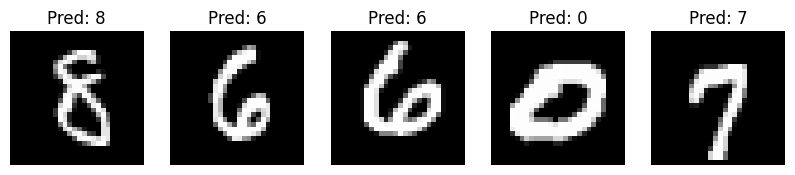

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Data loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# CNN model architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Model initialization
model = CNN().to(device)

# Loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Model evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

# Visualize predictions on sample images
sample_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5, shuffle=True)
sample_images, sample_labels = next(iter(sample_loader))
sample_images, sample_labels = sample_images.to(device), sample_labels.to(device)
sample_outputs = model(sample_images)
_, sample_predicted = torch.max(sample_outputs, 1)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].squeeze().cpu(), cmap='gray')
    plt.title(f'Pred: {sample_predicted[i].item()}')
    plt.axis('off')
plt.show()
